In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date

('2017-08-23',)

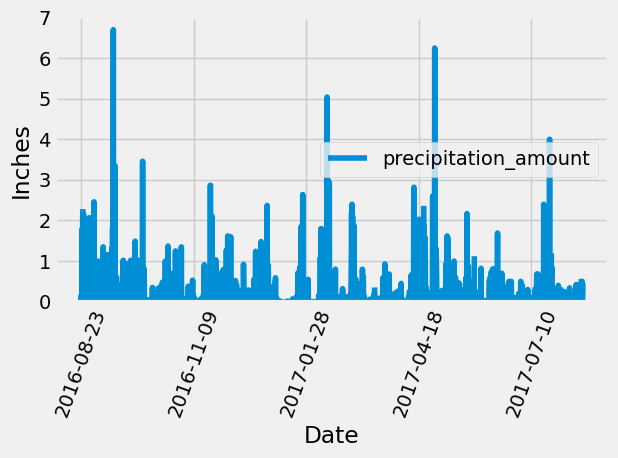

In [23]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
values = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-22').\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(values, columns=["measurement_date", "precipitation_amount"])
precipitation_df = precipitation_df.set_index("measurement_date")
precipitation_df

# Perform a query to retrieve the data and precipitation scores
values_final_df.plot()
plt.ylim(0,7)
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.tight_layout()
plt.show()


In [24]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation_amount
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [25]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.station).count()


9

In [26]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station,func.count(Measurement.station)).\
    order_by(func.count(Measurement.station).desc()).\
    group_by(Measurement.station).all() 

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [28]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = session.query(Measurement.station,func.count(Measurement.station)).\
    order_by(func.count(Measurement.station).desc()).\
    group_by(Measurement.station).first()
most_active_station_number = most_active_station[0]

#lowest temperature
lowest_temperature = session.query(func.min(Measurement.tobs)).\
  filter(Measurement.station==most_active_station_number).all()
print(lowest_temperature) 

#highest temperature
highest_temperature = session.query(func.max(Measurement.tobs)).\
  filter(Measurement.station==most_active_station_number).all()
print(highest_temperature)

#average temperature
average_temperature = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station==most_active_station_number).all()
print(average_temperature)

[(54.0,)]
[(85.0,)]
[(71.66378066378067,)]


(0.0, 70.0)

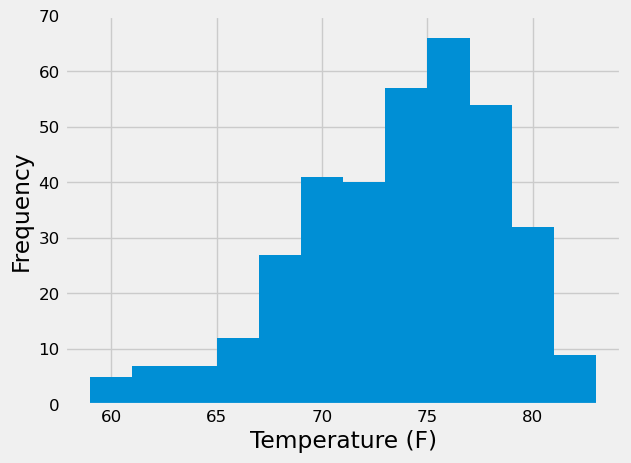

In [31]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

most_recent_date_station = session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.station == most_active_station_number).\
    order_by(Measurement.date.desc()).first()
most_recent_date_station
#2017-08-18
twelve_month_values = session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.station == most_active_station_number).\
    filter(Measurement.date > '2016-08-17').all()

#plot
twelve_month_values_df = pd.DataFrame(twelve_month_values)["tobs"]
twelve_month_values_df 

hist = twelve_month_values_df.hist(bins=12) 
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,70)

# Close Session

In [16]:
# Close Session
session.close()